#### User Story 3 : Entraînement des modèles de clustering avec K-Means



**Déterminer la valeur optimale de k via la méthode du coude et silhouette**

1 clusters = 6143.999999999999
2 clusters = 4770.989961257367
3 clusters = 4132.844132992005
4 clusters = 3833.980947752912
5 clusters = 3658.6217813054536
6 clusters = 3401.1902393852884
7 clusters = 3285.478048957252
8 clusters = 3089.9848490233826
9 clusters = 2996.5265030361957
10 clusters = 2930.4986537849377


Text(0.5, 0.98, ' la courbe d’inertie  pour appuyer le choix de k.')

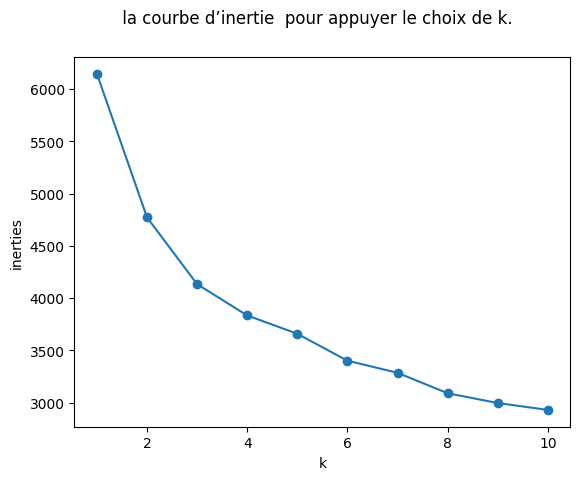

In [121]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv("../data/processed/diabetes_data_cleaned_standardized.csv")
K=range(1,11)
inerties=[]
for k in K :
    k_means_model=KMeans(n_clusters=k,random_state=42)
    k_means_model.fit(df)
    inerties.append(k_means_model.inertia_)
    print(f"{k} clusters = {k_means_model.inertia_}")
plt.plot(K,inerties,marker="o")
plt.xlabel("k")
plt.ylabel("inerties")
plt.suptitle(" la courbe d’inertie  pour appuyer le choix de k.")

**Visualiser la courbe d’inertie et silhouette pour appuyer le choix de k**

Text(0.5, 0.98, ' la courbe de silhouette pour appuyer le choix de k.')

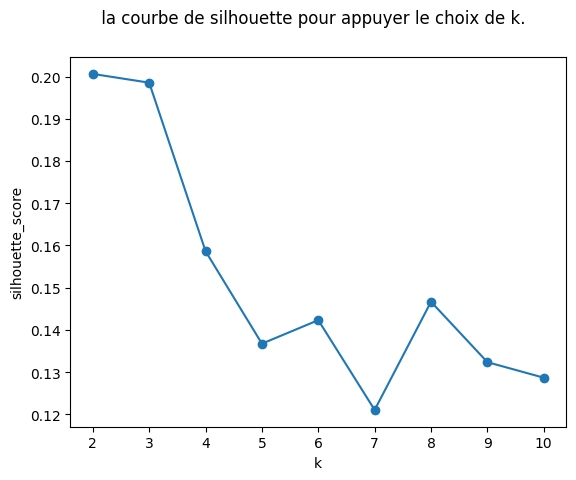

In [122]:
from sklearn.metrics import silhouette_score

K=range(2,11)
silhouette_sc=[]
for k in K :
    model_kmeans=KMeans(n_clusters=k,random_state=42)
    model_kmeans.fit(df)
    silhouette=silhouette_score(df,model_kmeans.labels_)
    silhouette_sc.append(silhouette)

plt.plot(K,silhouette_sc,marker="o")
plt.xlabel("k")
plt.ylabel("silhouette_score")
plt.suptitle(" la courbe de silhouette pour appuyer le choix de k.")

**Entraîner un modèle K-Means avec le nombre de clusters choisi.**

In [140]:
df_cleaned=pd.read_csv("../data/processed/diabetes_data_cleaned.csv")
print(df_cleaned.head())
KMeans_model=KMeans(2,random_state=42)
KMeans_model.fit(df)
labels=KMeans_model.labels_
centroids=KMeans_model.cluster_centers_
print("Inertie du modèle :", KMeans_model.inertia_)
df['Cluster'] = labels
df_cleaned['Cluster'] = labels
df_cleaned.to_csv("../data/processed/diabetes_data_cleaned.csv",index=False)

df.to_csv("../data/processed/data_cleabed_standardized_clustred.csv",index=False)
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin   BMI  \
0     1.945910    148.0           72.0           35.0  5.203221  33.6   
1     0.693147     85.0           66.0           29.0  4.057977  26.6   
2     2.197225    183.0           64.0           27.0  5.147494  23.3   
3     0.693147     89.0           66.0           23.0  4.553877  28.1   
4     0.000000    137.0           40.0           35.0  5.129899  43.1   

   DiabetesPedigreeFunction       Age  
0                  0.486738  3.931826  
1                  0.300845  3.465736  
2                  0.514021  3.496508  
3                  0.154436  3.091042  
4                  1.190279  3.526361  
Inertie du modèle : 4770.989961257367
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.825781  0.866088      -0.029786       0.666679  0.570502  0.175717   
1    -0.802604 -1.202351      -0.526828      -0.001845 -1.363052 -0.855806   
2     1.152449  2.015220      -0.692509      -0.2

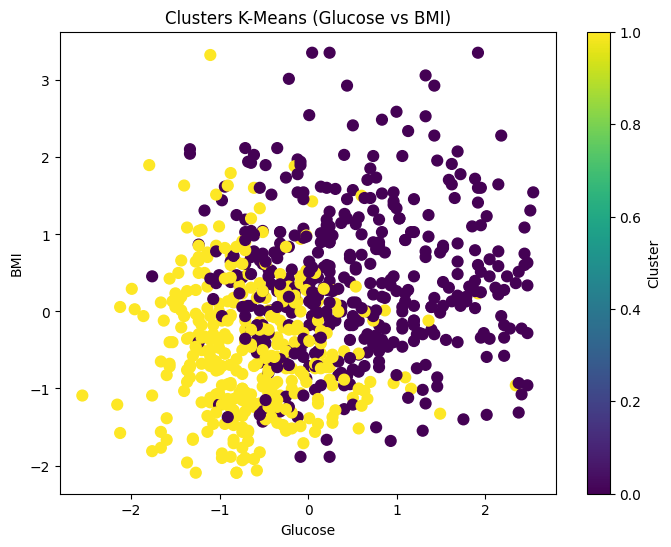

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Glucose'], df['BMI'], c=df['Cluster'], cmap='viridis', s=60)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Clusters K-Means (Glucose vs BMI)')
plt.colorbar(label='Cluster')
plt.show()



Variance expliquée par PC1 et PC2 : [33.89272896 18.35930915]
Variance totale expliquée : 52.2520381041289 %
        PC1       PC2
0  1.799664  0.727801
1 -1.939327 -0.032613
2  0.711672  1.105442
3 -2.222950 -0.369853
4  0.643563 -3.137515


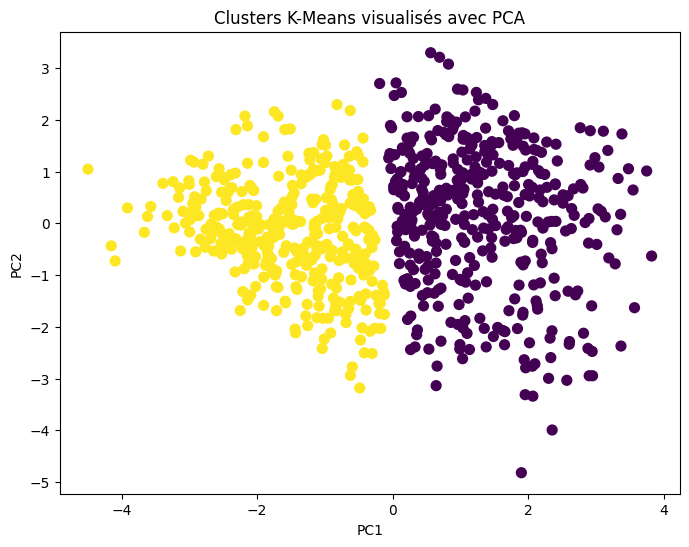

In [139]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

variance_expliquee = pca.explained_variance_ratio_ * 100
print("Variance expliquée par PC1 et PC2 :", variance_expliquee)
print("Variance totale expliquée :", variance_expliquee.sum(), "%")

print(pca_df.head())

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=50)
plt.title("Clusters K-Means visualisés avec PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
